In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('fuel-prices/AIP_TGP_Data_21-Feb-2020.csv', index_col='date', parse_dates=True)
df.rename(columns={'Sydney': 'wholesale_price'}, inplace=True)
df

wholesale_price  Melbourne  Brisbane  Adelaide  Perth  Darwin  \
date                                                                        
2004-01-01             86.3       85.1      86.4      87.2   88.5    89.7   
2004-01-02             86.3       85.1      86.4      87.2   88.5    89.7   
2004-01-05             86.4       85.3      86.4      87.2   89.0    89.7   
2004-01-06             86.8       85.6      87.0      87.7   89.1    90.3   
2004-01-07             86.7       85.5      87.0      87.7   89.1    90.3   
...                     ...        ...       ...       ...    ...     ...   
2020-02-17            126.4      125.7     125.8     126.2  125.4   130.3   
2020-02-18            126.6      126.0     126.0     126.4  125.6   130.5   
2020-02-19            126.7      126.1     126.1     126.5  125.8   130.7   
2020-02-20            126.7      126.0     126.1     126.4  125.7   130.6   
2020-02-21            127.0      126.6     126.6     127.0  126.2   131.1   

            Hobart  National Average  
date                                  
2004-01-01    87.9              86.4  
2004-01-02    87.9              86.4  
2004-01-05    87.9              86.5  
2004-01-06    88.5              86.9  
2004-01-07    88.5              86.8  
...            ...               ...  
2020-02-17   131.5             126.0  
2020-02-18   131.6             126.2  
2020-02-19   131.8             126.4  
2020-02-20   131.7             126.3  
2020-02-21   132.3             126.8  

[4212 rows x 8 columns]

In [3]:
df = df.drop(df[(df.index < '2017-01-01') | (df.index >= '2020-01-01')].index)
df

wholesale_price  Melbourne  Brisbane  Adelaide  Perth  Darwin  \
date                                                                        
2017-01-02            118.3      117.9     118.4     118.1  118.4   122.7   
2017-01-03            118.3      117.9     118.4     118.1  118.4   122.7   
2017-01-04            118.6      118.2     118.7     118.4  118.5   123.0   
2017-01-05            119.1      118.7     119.1     118.8  119.0   123.5   
2017-01-06            119.4      118.9     119.4     119.1  119.2   123.7   
...                     ...        ...       ...       ...    ...     ...   
2019-12-25            133.5      132.9     133.5     133.4  132.6   137.1   
2019-12-26            133.6      133.1     133.6     133.6  132.8   137.3   
2019-12-27            133.8      133.2     133.8     133.7  132.9   137.4   
2019-12-30            135.1      134.6     135.1     135.0  134.1   138.7   
2019-12-31            136.0      135.5     135.7     135.8  134.8   139.4   

            Hobart  National Average  
date                                  
2017-01-02   122.6             118.4  
2017-01-03   122.6             118.4  
2017-01-04   122.9             118.6  
2017-01-05   123.4             119.1  
2017-01-06   123.6             119.3  
...            ...               ...  
2019-12-25   138.9             133.3  
2019-12-26   139.1             133.5  
2019-12-27   139.3             133.6  
2019-12-30   140.5             134.9  
2019-12-31   141.3             135.7  

[782 rows x 8 columns]

In [4]:
df = df[['wholesale_price']]

In [5]:
number_of_days = 365 * 3
df

wholesale_price
date                       
2017-01-02            118.3
2017-01-03            118.3
2017-01-04            118.6
2017-01-05            119.1
2017-01-06            119.4
...                     ...
2019-12-25            133.5
2019-12-26            133.6
2019-12-27            133.8
2019-12-30            135.1
2019-12-31            136.0

[782 rows x 1 columns]

In [6]:
dti = pd.date_range('2017-01-01', periods=number_of_days, freq='D')
df_full = pd.DataFrame([x for x in range(number_of_days)], dti, columns=['delme'])
df = df.merge(df_full, how='right' ,left_index=True, right_index=True, validate='one_to_one')
del df['delme']
df.wholesale_price.fillna(method='bfill', inplace=True)
df.wholesale_price = df.wholesale_price.apply(lambda x: x * 10).astype('int')
df

wholesale_price
2017-01-01             1183
2017-01-02             1183
2017-01-03             1183
2017-01-04             1186
2017-01-05             1191
...                     ...
2019-12-27             1338
2019-12-28             1351
2019-12-29             1351
2019-12-30             1351
2019-12-31             1360

[1095 rows x 1 columns]

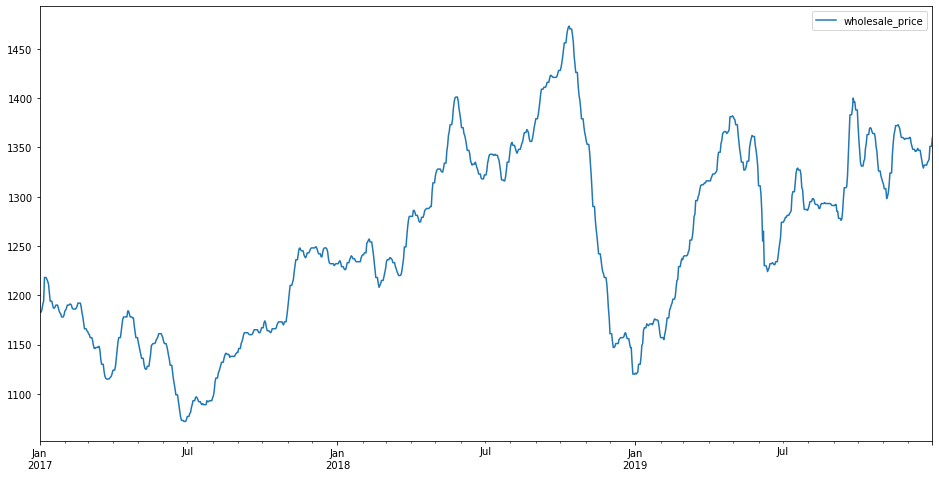

In [7]:
df.plot(figsize=(16,8))

In [8]:
df.to_csv('fuel-prices/wholesale_price-2017-2019.csv',index_label='date', columns=['wholesale_price'])